In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10, 6)
import theano
import theano.tensor as T
import cPickle as pickle
import os
load_path = '../../final_saved/boston/lang/'
data_path = '../../../data/boston'
from plot_style import init_rc_params
init_rc_params()

heatmap

In [4]:
for f in os.listdir(load_path):
    print f
    with open(os.path.join(load_path, f), 'rb') as inp:
        data = pickle.load(inp)
    print data['validation'][-1]

0.00025_1e+07.pckl
-4952.20470211
0.001_1e+09.pckl
-4540.85150771
0.005_10.0.pckl
-47153.6386246
0.001_1000.0.pckl
-4560.77185137
0.0005_10.0.pckl
-4870.63259095
0.0001_1e+09.pckl
-5844.84273152
0.0005_1e+07.pckl
-5055.77841634
0.0001_1000.0.pckl
-5793.72378525
0.005_1000.0.pckl
nan
0.005_1e+07.pckl
nan
0.0025_1000.0.pckl
-6744.34144145
0.001_100000.0.pckl
-4434.60714262
0.0025_100000.0.pckl
-8480.25474677
0.0025_1e+09.pckl
-8575.99332782
0.0005_1e+09.pckl
-4928.93825312
0.00025_1e+09.pckl
-4993.8693889
0.0001_10.0.pckl
-5761.08276008
0.0025_1e+07.pckl
-6477.62245333
0.001_1e+07.pckl
-4392.99252062
0.005_1e+09.pckl
nan
0.001_10.0.pckl
-4381.23250886
0.0005_100000.0.pckl
-4721.8032306
0.0001_1e+07.pckl
-5746.84846583
0.0005_1000.0.pckl
-4810.34122422
0.005_100000.0.pckl
-25876.6293604
0.00025_10.0.pckl
-4905.07707768
0.0001_100000.0.pckl
-5725.67180726
0.0025_10.0.pckl
-7948.41160072
0.00025_100000.0.pckl
-4947.98516955
0.00025_1000.0.pckl
-5008.83017449


0.00025_1e+07.pckl
0.001_1e+09.pckl
0.005_10.0.pckl
0.001_1000.0.pckl
0.0005_10.0.pckl
0.0001_1e+09.pckl
0.0005_1e+07.pckl
0.0001_1000.0.pckl
0.005_1000.0.pckl
0.005_1e+07.pckl
0.0025_1000.0.pckl
0.001_100000.0.pckl
0.0025_100000.0.pckl
0.0025_1e+09.pckl
0.0005_1e+09.pckl
0.00025_1e+09.pckl
0.0001_10.0.pckl
0.0025_1e+07.pckl
0.001_1e+07.pckl
0.005_1e+09.pckl
0.001_10.0.pckl
0.0005_100000.0.pckl
0.0001_1e+07.pckl
0.0005_1000.0.pckl
0.005_100000.0.pckl
0.00025_10.0.pckl
0.0001_100000.0.pckl
0.0025_10.0.pckl
0.00025_100000.0.pckl
0.00025_1000.0.pckl
(array([0]), array([3]))
best alpha 10.0 lr 0.001


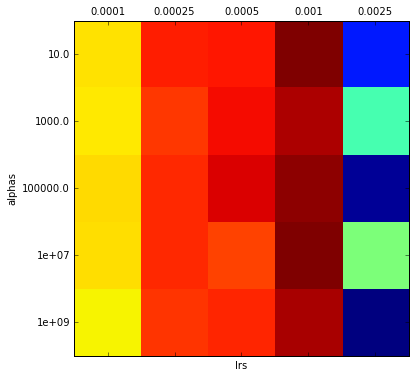

In [13]:
results = []
for f in os.listdir(load_path):
    print f
    with open(os.path.join(load_path, f), 'rb') as inp:
        try:            
            data = pickle.load(inp)
            if data['lr']<0.004: 
                results.append((data['lr'], data['alpha'], data['validation'][-1]))
        except:
            print 'bad'
        
alphas = sorted(list(set([r[1] for r in results])))
lrs = sorted(list(set([r[0] for r in results])))
matrix = np.zeros((len(alphas), len(lrs)))
for r in results:
    lr_id = lrs.index(r[0])
    a_id = alphas.index(r[1])
    q = r[2]
    matrix[a_id, lr_id] = q
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(matrix)
plt.ylabel('alphas')
plt.xlabel('lrs')
ax.set_yticklabels(['']+  [str(a) for a in alphas])
ax.set_xticklabels([''] + [str(l) for l in lrs])
best = np.where(matrix == np.max(matrix))
print best
print 'best', 'alpha', alphas[best[0][0]], 'lr', lrs[best[1][0]]

In [12]:
lrs

[9.9999997e-05,
 0.00025000001,
 0.00050000002,
 0.001,
 0.0024999999,
 0.0049999999]

convergence

82


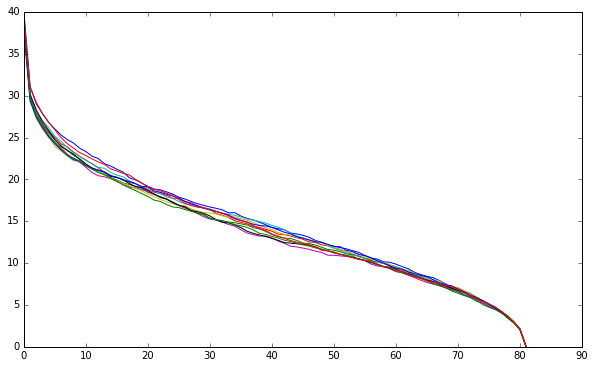

In [30]:
with open(os.path.join(load_path, '0.001_1000.0.pckl')) as inp:
    data = pickle.load(inp)
print len(data['params'])
optima = data['params'][-1]
convs = [[] for _ in range(len(optima))]
for i in xrange(len(optima)):
    for p in data['params']:
        convs[i].append(np.linalg.norm(p[i]-optima[i]))
    plt.plot(convs[i])

stability (noise in data)

0.0 77.0494499374 2.32531760929
0.1 77.7698063572 2.14144047242
0.2 79.5228613889 2.72285918151
0.3 83.0678836584 3.06809632171
0.4 87.1772568531 2.96854740786
0.5 94.0195925377 5.51199787346
0.6 101.126851641 6.58993244019
0.7 109.857781152 5.21813896582
0.8 122.785238702 5.82623027497
0.9 132.887513148 6.94943771943
1.0 144.824137148 5.29468739477
1.1 157.449044463 10.8331762099
1.2 168.068536076 6.410597888
1.3 188.955994865 9.58402235477
1.4 201.216652143 15.1307806739
1.5 216.652888575 16.9279341038
1.6 227.004044949 14.5509173709
1.7 249.295921317 13.8688907303
1.8 247.336968873 8.9596740309
1.9 273.209421896 15.5775033046


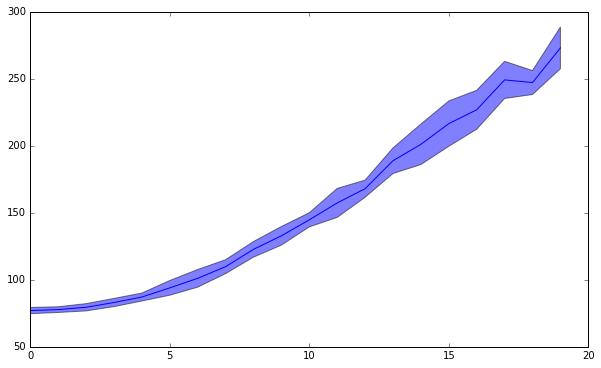

In [26]:
test_x = np.load(os.path.join(data_path, 'test_x.npy'))
test_y = np.load(os.path.join(data_path, 'test_y.npy'))
with open(os.path.join(load_path, '1e-07_100.0.pckl')) as inp:
    data = pickle.load(inp)
if len(data['params'])==10**4:
    params = data['params'][-1]
else:    
    params = data['params'][-6]
param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:test_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
b1 = param[-hidden_num-1:-1]
W2 = param[test_x.shape[1]*hidden_num:test_x.shape[1]*hidden_num+hidden_num*1].reshape((hidden_num, 1))
b2 = param[-1:]
hidden = T.tanh(T.dot(X, W1)+b1)
output = T.dot(hidden, W2) + b2
cost = T.mean((output.T - Y)**2)
monitor = theano.function([X,Y,param], cost)
results =[]
results_std = []
for noise_level in range(0,20):
    result = []
    noise = noise_level*1.0/10
    for p in params:
        result.append(monitor(test_x + np.random.randn(test_x.shape[0],test_x.shape[1])*noise, test_y, p))
    results.append(np.mean(result))
    results_std.append(np.std(result))
    print noise, results[-1], results_std[-1]
results = np.array(results)
results_std = np.array(results_std)
plt.fill_between(range(len(results)), results-results_std, results+results_std, alpha=0.5)
plt.plot(range(len(results)), results)


stability (noise in params)

0.0 40.2514371043 8.92270518584
0.1 43.274635412 11.2377866257
0.2 46.4593531262 10.9185193293
0.3 72.5811938848 43.9495730072
0.4 83.4030131206 29.9517533273
0.5 104.976540902 24.1949222914
0.6 95.0295161455 40.9763490232
0.7 185.964349755 58.1204177615
0.8 153.36895779 45.2503457746
0.9 189.290489492 59.9523646481
1.0 238.518140045 115.707885755
1.1 231.848781967 91.740714769
1.2 295.830817187 186.173902817
1.3 246.683798563 138.195166005
1.4 243.482945845 114.626487032
1.5 361.708948152 179.751760157
1.6 331.824318674 198.127929628
1.7 391.850950194 172.681310638
1.8 276.693433976 113.747622996
1.9 592.461681992 424.155653837


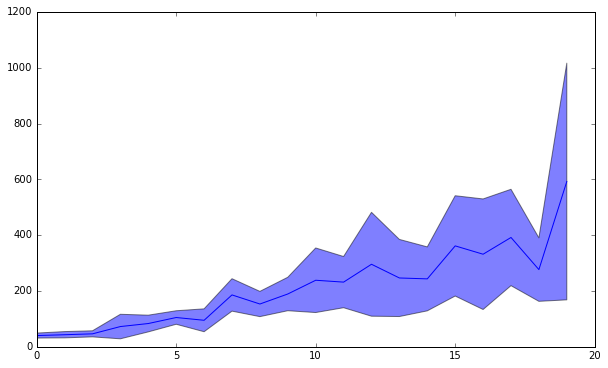

In [32]:
test_x = np.load(os.path.join(data_path, 'test_x.npy'))
test_y = np.load(os.path.join(data_path, 'test_y.npy'))
with open(os.path.join(load_path, '0.001_1000.0.pckl')) as inp:
    data = pickle.load(inp)
if len(data['params'])==10**4:
    params = data['params'][-1]
else:
    params = data['params'][-6]
param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:test_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
b1 = param[-hidden_num-1:-1]
W2 = param[test_x.shape[1]*hidden_num:test_x.shape[1]*hidden_num+hidden_num*1].reshape((hidden_num, 1))
b2 = param[-1:]
hidden = T.tanh(T.dot(X, W1)+b1)
output = T.dot(hidden, W2) + b2
cost = T.mean((output.T - Y)**2)
monitor = theano.function([X,Y,param], cost)
results =[]
results_std = []
for noise_level in range(0,20):
    result = []
    noise = noise_level*1.0/10
    for p in params:
        result.append(monitor(test_x, test_y, p  + np.random.randn(p.shape[0])*noise))
    results.append(np.mean(result))
    results_std.append(np.std(result))
    print noise, results[-1], results_std[-1]
results = np.array(results)
results_std = np.array(results_std)
plt.fill_between(range(len(results)), results-results_std, results+results_std, alpha=0.5)
plt.plot(range(len(results)), results)


learning curve

0
50
100
max 2386.11591797
min 279347.228219


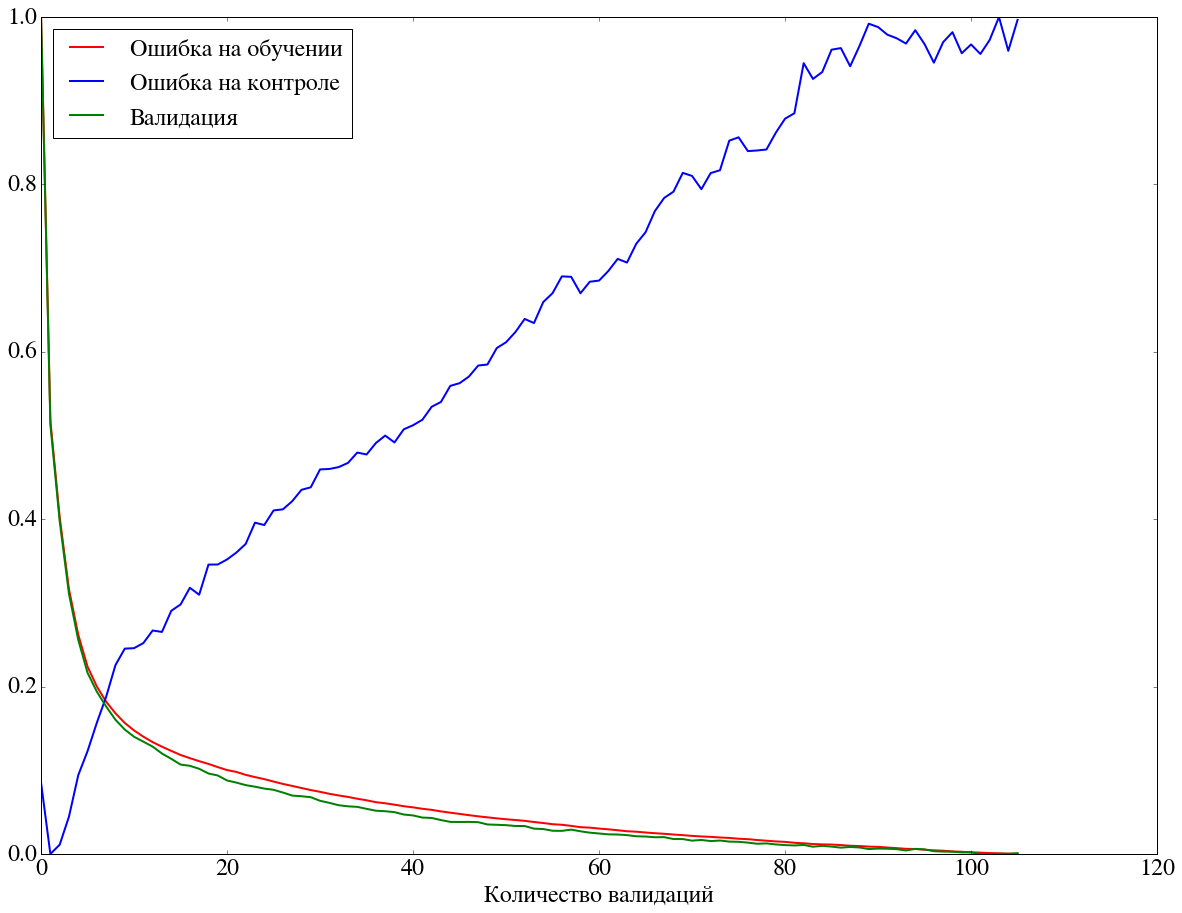

In [2]:
test_x = np.load(os.path.join(data_path, 'test_x.npy'))
test_y = np.load(os.path.join(data_path, 'test_y.npy'))

train_x = np.load(os.path.join(data_path, 'train_x.npy'))
train_y = np.load(os.path.join(data_path, 'train_y.npy'))
results_train, results_test, results_validation = [],[],[]
with open(os.path.join(load_path, '0.001_10.0.pckl')) as inp:
    data = pickle.load(inp)
all_params = data['params']
param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:test_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
b1 = param[-hidden_num-1:-1]
W2 = param[test_x.shape[1]*hidden_num:test_x.shape[1]*hidden_num+hidden_num*1].reshape((hidden_num, 1))
b2 = param[-1:]
hidden = T.log(1 + T.exp(T.dot(X, W1)+b1))
output = T.dot(hidden, W2) + b2
cost = T.sum((output.T - Y)**2)*train_x.shape[0]/X.shape[0]
monitor = theano.function([X,Y,param], cost,allow_input_downcast=True)
results =[]
results_std = []
for i,params in enumerate(all_params):
    if i%50==0:
        print i 
    result_train = []
    result_test = []    
    for p in params:
        result_train.append( monitor(train_x, train_y, p))
        result_test.append(monitor(test_x, test_y, p))
        result_validation = data['validation'][i]
    results_train.append(np.mean(result_train))
    results_test.append((np.mean(result_test)))
    results_validation.append(result_validation)
    
    #print result_validation
min_ = np.min([results_train, results_test])
max_ = np.max([results_train, results_test])
print 'max', min_
print 'min', max_
results_train = np.array(results_train[1:])
results_test = np.array(results_test[1:])
results_validation = -np.array(results_validation[1:])
results_train = (results_train - np.min(results_train)) / ((np.max(results_train) - np.min(results_train)))
results_test = (results_test - np.min(results_test)) / ((np.max(results_test) - np.min(results_test)))
results_validation = (results_validation - np.min(results_validation)) / ((np.max(results_validation) - np.min(results_validation)))
plt.plot(results_train,'r', label= u'Ошибка на обучении')
plt.plot(results_test,'b', label=u'Ошибка на контроле')
plt.plot(results_validation, 'g', label=u'Валидация')
plt.legend(loc='best')
plt.xlabel(u'Количество валидаций', fontsize=24)


In [ ]:
test_x = np.load(os.path.join(data_path, 'test_x.npy'))
test_y = np.load(os.path.join(data_path, 'test_y.npy'))

train_x = np.load(os.path.join(data_path, 'train_x.npy'))
train_y = np.load(os.path.join(data_path, 'train_y.npy'))

results_train, results_test, results_validation = [],[],[]
with open(os.path.join(load_path,'0.001_1000.0.pckl')) as inp:
    data = pickle.load(inp)
all_params = data['params']
param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:test_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
b1 = param[-hidden_num-1:-1]
W2 = param[test_x.shape[1]*hidden_num:test_x.shape[1]*hidden_num+hidden_num*1].reshape((hidden_num, 1))
b2 = param[-1:]
hidden = T.tanh(T.dot(X, W1)+b1)
output = T.dot(hidden, W2) + b2
cost = T.sum((output.T - Y)**2)*train_x.shape[0]/X.shape[0]
monitor = theano.function([X,Y,param], cost)
results =[]
results_std = []
for i,params in enumerate(all_params):
    if i%50==0:
        print i 
    result_train = []
    result_test = []    
    for p in params:
        result_train.append( monitor(train_x, train_y, p))
        result_test.append(monitor(test_x, test_y, p))
        result_validation = data['validation'][i]
    results_train.append(np.mean(result_train))
    results_test.append((np.mean(result_test)))
    results_validation.append(result_validation)

results_validation = np.array(results_validation)
plt.plot(-results_validation)
